In [68]:
%run MyLibrary.ipynb 

In [69]:
#Q1 
#Numerically integrate the following using Midpoint,
#Trapezoidal and Simpson techniques for N = 8, 16 and 24 and 
#compare the result (in tabular format) with the actual analytical result.

In [70]:

# Function to calculate the number of iterations needed to get
# correct integration value with error upto eps order decimal places

def correctIterations_integration(f_mp, f_t, f_s, eps=10**-6):
    # To calculate N from error calculation formula
    M_N=((b-a)**3/24/eps*f_mp)**0.5
    T_N=((b-a)**3/12/eps*f_t)**0.5
    S_N=((b-a)**5/180/eps*f_s)**0.25

    # Using integral value, also handling the case where eps=0
    if M_N==0:
        M_N=1
    else:
        M_N=int(M_N)

    if T_N==0:
        T_N=1
    else:
        T_N=int(T_N)
    
    if S_N==0:
        S_N=1
    else:
        S_N=int(S_N)
  
    # changing S_N value to S_N + 1 for odd values of S_N 
    if S_N%2!=0:
        S_N+=1

    return M_N, T_N, S_N



# Midpoint method
def integral_midpoint(f, x1, x2, n):
    s=0
    h=(x2-x1)/n # step size
    
    
    for i in range(1,n+1):
        x=x1+(2*i-1)*h/2
        s+=f(x)
    
    return s*h



# Trapezoidal method
def integral_trapezoidal(f, x1, x2, n):
    s=0
    h=(x2-x1)/n 
    
    
    for i in range(1,n+1):
        s+=f(x1+i*h)+f(x1+(i-1)*h)
    
    return s*h/2



# Simpson method
def integral_simpson(f, x1, x2, n):
    s=f(x1)+f(x2)
    h=(x2-x1)/n
    
    
    for i in range(1,n):
        if i%2!=0:
            s+=4*f(x1+i*h)
        else:
            s+=2*f(x1+i*h)
    
    return s*h/3



In [71]:
def f1(x):
    return math.sqrt(1+1/x)

def f2(x):
    return x**4

eps=10**-6
x1=1
x2=4

MP=[]
TR=[]
SMP=[]

N1=8

MP.append(integral_midpoint(f1, x1, x2, N1))
TR.append(integral_trapezoidal(f1, x1, x2, N1))
SMP.append(integral_simpson(f1, x1, x2, N1))

N2=16

MP.append(integral_midpoint(f1, x1, x2, N2))
TR.append(integral_trapezoidal(f1, x1, x2, N2))
SMP.append(integral_simpson(f1, x1, x2, N2))

N3=24

MP.append(integral_midpoint(f1, x1, x2, N3))
TR.append(integral_trapezoidal(f1, x1, x2, N3))
SMP.append(integral_simpson(f1, x1, x2, N3))




# feeding maximum of second derivative of function for Mid-point and Trapezoidal
f_mp=0.619 
f_t=0.619 
# feeding maximum of fourth derivative of function for Simpson
f_s=6.016 

M_N, T_N, S_N = correctIterations_integration(f_mp, f_t, f_s)

MP.append(integral_midpoint(f1, x1, x2, M_N))
TR.append(integral_trapezoidal(f1, x1, x2, T_N))
SMP.append(integral_simpson(f1, x1, x2, S_N))


print ("{:<20} {:<25} {:<25} {:<25}".format('No. of iterations', 'midpoint', 'trapezoidal', 'Simpson'))
print()
print ("{:<20} {:<25} {:<25} {:<25}".format(N1, MP[0], TR[0], SMP[0]))
print ("{:<20} {:<25} {:<25} {:<25}".format(N2, MP[1], TR[1], SMP[1]))
print ("{:<20} {:<25} {:<25} {:<25}".format(N3, MP[2], TR[2], SMP[2]))
print()
print ("{:<20} {:<25} {:<25} {:<25}".format('Actual value', MP[3], TR[3], SMP[3]))


No. of iterations    midpoint                  trapezoidal               Simpson                  

8                    3.6183138593298727        3.623956949398562         3.6203301434402904       
16                   3.619709761707181         3.6211354043642174        3.6201948893527693       
24                   3.619972785533525         3.620607687124767         3.620186449815972        

Actual value         3.6201841052416963        3.6201844561676655        3.620184367459324        


In [72]:
#Q2
#Numerically integrate the following using midpoint,
#trapezoidal and simpson techniques with maximum error of 0.001.

In [73]:
def f2(x):
    return x*math.sqrt(1+x)

eps=10**-4
x1=0
x2=1

# feeding the maximum of second derivative of function for midpoint and trapezoidal
f_mp=1 
f_t=1 
# feeding the maximum of fourth derivative of function for simpson
f_s=1.5 # for f2

M_N, T_N, S_N = correctIterations_integration(f_mp, f_t, f_s, eps)

MP=(integral_midpoint(f2, x1, x2, M_N))
TR=(integral_trapezoidal(f2, x1, x2, T_N))
SM=(integral_simpson(f2, x1, x2, S_N))

print("For midpoint, N = " + str(M_N) + " and integral = " + str(MP))
print("For trapezoidal, N = " + str(T_N) + " and integral = " + str(TR))
print("For simpson, N = " + str(S_N) + " and integral = " + str(SM))


For midpoint, N = 106 and integral = 0.6437874361804016
For trapezoidal, N = 150 and integral = 0.6437931268792875
For simpson, N = 12 and integral = 0.64379042999369


In [74]:




import numpy as np
def integral_montecarlo(f,x1,x2,n):
    array = np.array(np.random.uniform(low = 0.0, high = 1.0 ,size = n))
    array = x1 + (x2-x1)*array
    F = 0
    for i in range(n):
        F += ((x2-x1)*f(array[i]))/n
    avg_f2 = 0
    f_avg2 = 0
    for i in range(n):
        avg_f2 =+ f(array[i])**2
    for i in range(n):
        f_avg2 =+ f(array[i])
        
    si = avg_f2/n - (f_avg2/n)**2
        
    return F,si
    


In [75]:
#Q3
#Use Monte Carlo to estimate the value of π from the following integral of f3.
#Use system built random number generator and sample N starting from 10 and keep increasing in multiple of 10.
#Go as far as possible within a reasonable time. Plot π vs. N.

The integral value in the last iteration is 3.148688665970765


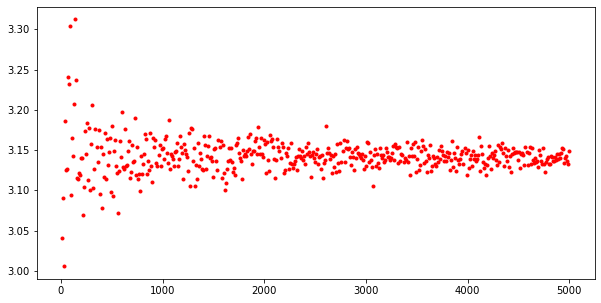

In [76]:
import math
import matplotlib.pyplot as plt

def f3(x):
    return 4/(1+x**2)

plt.figure(figsize=(10,5))

pi = []
N = []
n = 500

for i in range(n):
    x = 10*i + 10
    y = integral_montecarlo(f3,0,1,x)
    N.append(x)
    pi.append(y[0])
    
plt.plot(N,pi,"r.")

print("The integral value in the last iteration is " + str(pi[-1]))





In [77]:
#Q4
#A beam 2 meter long has linear mass density λ(x) = x2, where x is measured from one of the ends
#Find the center of mass of the beam numerically.

In [78]:
print("Given, linear mass density is \u03BB(x) = x^2")

print("Centre of mass of a given mass distribution \u03BB(x) = integral{x\u03BB(x) dx}/inegral{x dx}")

def f4(x):
    return x**2
def f5(x):
    return x**3

eps=10**-6
x1=0
x2=2

#for f4
# feeding here maximum of second derivative of function for midpoint and trapezoidal
f_mp1=2    

M_N1, T_N1, S_N1 = correctIterations_integration(f_mp1, f_t, f_s, eps)
MP1=(integral_midpoint(f4, x1, x2, M_N1))
#for f5
# feeding here maximum of second derivative of function for midpoint and trapezoidal
f_mp2=12 

M_N2, T_N2, S_N2 = correctIterations_integration(f_mp2, f_t, f_s, eps)
MP2=(integral_midpoint(f5, x1, x2, M_N2))

print("linear mass density = x^2")
print("\nThe centre of mass calculated using midpoint method = " + str(MP2/MP1))


Given, linear mass density is λ(x) = x^2
Centre of mass of a given mass distribution λ(x) = integral{xλ(x) dx}/inegral{x dx}
linear mass density = x^2

The centre of mass calculated using midpoint method = 1.5000001111040284
